# Forecasting Portfolio Data
### Steps to accomplish the goal:
1. [Pull stock data using ALPACA APIs.](#Pull-stock-data-using-ALPACA-APIs.)
2. [Commence Monte Carlo Simulation.](#Commence-Monte-Carlo-Simulation.)

### Pull stock data using ALPACA APIs.

In [11]:
import os
import requests
import pandas as pd 
import numpy as np
import datetime

import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [12]:
load_dotenv()

True

In [13]:
pd.set_option("display.max_columns",None)

In [14]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")

Alpaca Key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [15]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [16]:
timeframe = "1D"

start_date = pd.Timestamp("2018-02-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-13", tz="America/New_York").isoformat()

top_10_tickers =  ['APPN','ARGX','BAND','DNLI','HLNE','KRYS','MDB','OKTA','ROKU','ZLAB']

df_top_10 = alpaca.get_barset(
    top_10_tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_top_10.tail()

APPN                                     ARGX  \
                              open      high    low  close   volume    open   
time                                                                          
2020-11-09 00:00:00-05:00  91.2500   98.5299  90.00  96.83  1219907  263.23   
2020-11-10 00:00:00-05:00  93.0300   97.6900  92.39  96.77  1339487  259.34   
2020-11-11 00:00:00-05:00  96.6600   96.9500  89.13  90.11   887424  257.75   
2020-11-12 00:00:00-05:00  89.6900   96.1100  89.69  94.22   887232  259.86   
2020-11-13 00:00:00-05:00  99.5099  100.9668  95.81  99.16   889088  265.54   

                                                                BAND  \
                              high      low   close  volume     open   
time                                                                   
2020-11-09 00:00:00-05:00  264.410  254.240  255.93  252434  158.140   
2020-11-10 00:00:00-05:00  259.955  246.020  250.28  244055  144.000   
2020-11-11 00:00:00-05:00  259.890  254.380  257.00  195711  145.170   
2020-11-12 00:00:00-05:00  263.180  259.395  263.18   59458  146.035   
2020-11-13 00:00:00-05:00  266.480  262.670  262.86   85535  150.060   

                                                                   DNLI  \
                               high      low    close     volume   open   
time                                                                      
2020-11-09 00:00:00-05:00  158.4050  143.450  143.880  1000351.0  54.55   
2020-11-10 00:00:00-05:00  147.1450  138.010  143.550   721968.0  58.00   
2020-11-11 00:00:00-05:00  147.4899  142.690  144.900   389298.0  59.80   
2020-11-12 00:00:00-05:00  152.3100  145.190  149.380   339978.0  66.00   
2020-11-13 00:00:00-05:00  150.9600  142.785  143.575   492884.0  71.19   

                                                              HLNE         \
                            high     low  close     volume    open   high   
time                                                                        
2020-11-09 00:00:00-05:00  57.43  52.340  55.81   675439.0  75.130  76.42   
2020-11-10 00:00:00-05:00  60.57  56.860  60.02  1153389.0  71.390  74.74   
2020-11-11 00:00:00-05:00  66.47  58.125  66.10  1562538.0  74.880  76.20   
2020-11-12 00:00:00-05:00  70.51  65.270  69.89  1175090.0  73.990  74.77   
2020-11-13 00:00:00-05:00  72.00  63.000  65.25  1157751.0  74.745  75.88   

                                                    KRYS                       \
                             low  close    volume   open   high    low  close   
time                                                                            
2020-11-09 00:00:00-05:00  71.01  71.38  292730.0  42.14  45.25  41.60  41.90   
2020-11-10 00:00:00-05:00  70.50  74.66  206725.0  43.00  43.00  40.66  41.88   
2020-11-11 00:00:00-05:00  74.19  74.76  101896.0  42.68  42.68  41.12  41.98   
2020-11-12 00:00:00-05:00  72.69  74.09  183632.0  41.95  42.84  41.25  41.50   
2020-11-13 00:00:00-05:00  73.50  75.72   82034.0  41.86  42.49  40.81  42.18   

                                        MDB                           \
                             volume    open    high      low   close   
time                                                                   
2020-11-09 00:00:00-05:00  200072.0  246.50  255.66  237.860  239.90   
2020-11-10 00:00:00-05:00  227334.0  237.57  238.42  219.510  230.00   
2020-11-11 00:00:00-05:00  142259.0  234.87  248.15  231.340  245.11   
2020-11-12 00:00:00-05:00  108529.0  246.36  254.49  245.620  250.62   
2020-11-13 00:00:00-05:00  183503.0  253.55  254.43  244.179  248.16   

                                        OKTA                            \
                              volume    open    high       low   close   
time                                                                     
2020-11-09 00:00:00-05:00   537860.0  219.02  228.98  209.5300  217.41   
2020-11-10 00:00:00-05:00  1197418.0  218.38  218.85  203.4200  213.16   
2020-1

In [18]:
MC_even = MCSimulation(
    portfolio_data = df_top_10,
    weights = [1/10]*10,
    num_simulation = 1000,
    num_trading_days = 252*3
)

# Print the simulation input data
MC_even.portfolio_data.head()

APPN                                            \
                            open   high    low  close  volume daily_return   
time                                                                         
2018-02-27 00:00:00-05:00  27.50  28.19  27.40  27.75  452924          NaN   
2018-02-28 00:00:00-05:00  27.85  28.01  27.00  27.00  354978    -0.027027   
2018-03-01 00:00:00-05:00  27.00  29.11  27.00  28.91  468558     0.070741   
2018-03-02 00:00:00-05:00  28.82  29.11  28.47  28.65  348908    -0.008993   
2018-03-05 00:00:00-05:00  28.77  28.98  27.53  28.78  430771     0.004538   

                            ARGX                                            \
                            open   high    low  close  volume daily_return   
time                                                                         
2018-02-27 00:00:00-05:00  79.64  80.00  78.87  78.87  207912          NaN   
2018-02-28 00:00:00-05:00  78.94  78.94  75.92  77.59  110751    -0.016229   
2018-03-01 00:00:00-05:00  75.72  83.49  75.49  82.09  303617     0.057997   
2018-03-02 00:00:00-05:00  82.15  86.08  81.46  85.19  203150     0.037763   
2018-03-05 00:00:00-05:00  83.10  84.57  81.48  83.08  129812    -0.024768   

                            BAND                                    \
                            open    high      low  close    volume   
time                                                                 
2018-02-27 00:00:00-05:00  28.00  28.220  27.2200  27.43  122134.0   
2018-02-28 00:00:00-05:00  27.50  28.180  27.1800  27.28  160779.0   
2018-03-01 00:00:00-05:00  27.60  27.610  26.2625  27.24  115740.0   
2018-03-02 00:00:00-05:00  27.21  27.265  26.2000  27.00   66567.0   
2018-03-05 00:00:00-05:00  26.70  27.850  26.2004  27.46  225563.0   

                                         DNLI                          \
                          daily_return   open     high    low   close   
time                                                                    
2018-02-27 00:00:00-05:00          NaN  22.05  22.1100  21.48  21.490   
2018-02-28 00:00:00-05:00    -0.005468  21.54  23.4500  21.00  22.890   
2018-03-01 00:00:00-05:00    -0.001466  22.98  23.0000  21.55  21.605   
2018-03-02 00:00:00-05:00    -0.008811  21.55  22.9899  21.00  22.755   
2018-03-05 00:00:00-05:00     0.017037  22.59  22.9900  21.10  22.550   

                                                   HLNE                \
                             volume daily_return   open   high    low   
time                                                                    
2018-02-27 00:00:00-05:00  249407.0          NaN  36.88  37.25  33.80   
2018-02-28 00:00:00-05:00  259406.0     0.065147  34.00  35.34  33.60   
2018-03-01 00:00:00-05:00  291430.0    -0.056138  35.65  35.80  34.26   
2018-03-02 00:00:00-05:00  214638.0     0.053228  34.31  37.81  33.86   
2018-03-05 00:00:00-05:00  233634.0    -0.009009  35.00  35.70  34.65   

                                                             KRYS           \
                             close     volume daily_return   open     high   
time                                                                         
2018-02-27 00:00:00-05:00  34.0100   362891.0          NaN   9.40  10.2100   
2018-02-28 00:00:00-05:00  34.9389   407839.0     0.027313   9.96  10.2495   
2018-03-01 00:00:00-05:00  34.9400  2098721.0     0.000031  10.09  10.2590   
2018-03-02 00:00:00-05:00  35.0000   632428.0     0.001717   9.81   9.9533   
2018-03-05 00:00:00-05:00  35.3900   195282.0     0.011143  10.00  10.0100   

                                                                  MDB         \
                             low   close   volume daily_return   open   high   
time                                                                           
2018-02-27 00:00:00-05:00  9.400  10.200  57883.0          NaN  30.95  31.50   
2018-02-28 00:00:00-05:00  9.550  10.080  24360.0    -0.011765  31.50  32.75   
2018-03-01 00:00:00-05

### Commence Monte Carlo Simulation.

In [19]:
MC_even.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2          3         4          5         6    \
0    1.000000  1.000000  1.000000   1.000000  1.000000   1.000000  1.000000   
1    1.012287  1.006297  0.998328   1.003979  1.016855   0.996915  1.012539   
2    1.014586  1.031693  0.987362   1.011345  1.029729   0.984734  1.028976   
3    1.011610  1.048901  0.980046   1.010466  1.012299   0.982935  1.032666   
4    1.006271  1.068422  0.976387   1.011422  1.031225   0.984664  1.047220   
..        ...       ...       ...        ...       ...        ...       ...   
752  5.619184  6.627622  7.122949   9.918246  6.514807  12.722948  4.678427   
753  5.635003  6.703523  7.133634  10.074385  6.604976  12.985519  4.753901   
754  5.671297  6.732187  7.095461  10.005637  6.683426  12.805686  4.793505   
755  5.669974  6.952965  7.235411  10.049763  6.724101  12.759069  4.813001   
756  5.650180  6.970429  7.163280  10.263431  6.914430  12.907810  4.902405   

          7          8          9          10        11        12        13   \
0    1.000000   1.000000   1.000000   1.000000  1.000000  1.000000  1.000000   
1    0.999280   0.990125   1.000679   0.993126  0.989704  0.991633  0.994396   
2    1.001830   0.994717   1.004213   1.012434  0.985513  1.000945  0.996230   
3    1.001272   0.991422   0.994636   1.022237  1.001123  0.992430  0.987016   
4    1.017637   0.994242   0.987734   1.032424  0.996134  0.993934  0.976565   
..        ...        ...        ...        ...       ...       ...       ...   
752  5.603168  14.365625  13.826402  10.790703  7.639303  7.200304  8.577685   
753  5.669628  14.569867  13.537666  10.689426  7.596304  7.106770  8.462023   
754  5.688864  14.682693  13.132592  10.564900  7.660896  7.059753  8.592569   
755  5.714231  14.694092  13.252842  10.619413  7.579153  6.951238  8.686868   
756  5.614926  14.771002  13.480818  10.633683  7.596140  6.889504  8.639900   

          14        15        16        17        18        19        20   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.995428  0.983655  1.010024  0.979478  1.017191  0.978935  1.012616   
2    0.987478  0.988539  1.022683  0.988085  1.001848  0.973762  1.003843   
3    0.981643  1.023882  1.028881  1.002994  1.009027  0.966205  0.990395   
4    0.989342  1.054095  1.019760  1.021527  1.017858  0.957485  0.996653   
..        ...       ...       ...       ...       ...       ...       ...   
752  6.292643  7.004721  6.468321  8.420612  8.082435  6.804474  8.790949   
753  6.366577  6.952677  6.377911  8.513345  8.057677  7.034758  8.872628   
754  6.261658  7.020660  6.317472  8.707296  7.947838  7.064019  8.857307   
755  6.275743  7.022058  6.477981  8.598280  7.955788  7.134275  8.913110   
756  6.273944  7.055164  6.523491  8.681999  8.020474  7.216616  9.051019   

          21        22        23        24        25         26        27   \
0    1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1    0.995204  1.014890  1.012424  0.985341  1.019414   0.984914  0.988234   
2    1.001011  1.011280  1.028135  0.995035  1.033216   1.000389  0.999686   
3    1.001447  1.024353  1.025717  0.986273  1.032632   1.012105  0.993559   
4    1.006290  1.043367  1.034472  0.989355  1.044185   1.034656  1.009273   
..        ...       ...       ...       ...       ...        ...       ...   
752  6.710556  4.502026  8.055454  5.787894  7.159327  10.849321  3.429862   
753  6.730759  4.561283  8.122549  5.747024  6.977970  10.749259  3.427152   
754  6.552775  4.632657  8.207545  5.727512  6.930118  10.590484  3.382402   
755  6.613402  4.690731  8.251441  5.772553  6.994642  10.676225  3.417126   
756  6.781577  4.701670  8.351515  5.853178  6.985054  10.632535  3.417464   

           28        29        30        31        32         33        34   \
0     1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     0.999767  1.014617  1.019502  0.991911  0.998566   1.002851  0.984331   
2

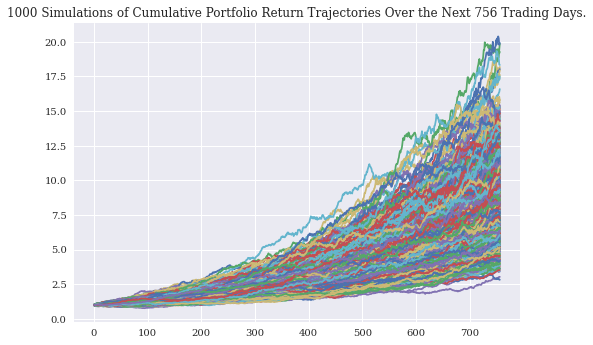

In [24]:
portfolio_simulation = MC_even.plot_simulation()
portfolio_simulation.get_figure().savefig("Images/portfolio_simulation.png",bbox_inches ="tight")

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

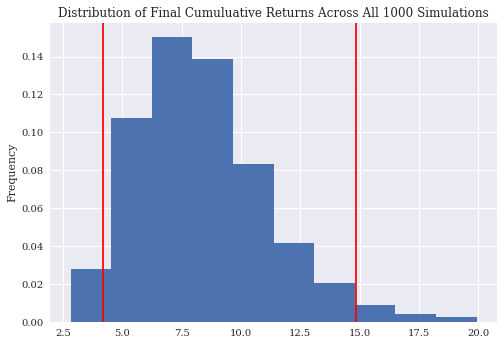

In [21]:
MC_even.plot_distribution()

In [22]:
portfolio_tbl = MC_even.summarize_cumulative_return()
print(portfolio_tbl)

count           1000.000000
mean               8.361982
std                2.744368
min                2.826927
25%                6.337294
50%                8.032945
75%                9.886750
max               19.925129
95% CI Lower       4.180279
95% CI Upper      14.827541
Name: 756, dtype: float64


In [23]:
initial_investment = 1000

ci_lower = round(portfolio_tbl[8]*initial_investment,2)
ci_upper = round(portfolio_tbl[9]*initial_investment,2)

ci_lower = ('${0:,.0f}').format(ci_lower)
ci_upper = ('${0:,.0f}').format(ci_upper)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" {ci_lower} and {ci_upper}.")

There is a 95% chance that an initial investment of $1000 in the portfolio over the next 3 years will end within in the range of $4,180 and $14,828.
